# Air Quality Prediction 

### Air Quality Index (AQI)
The Air Quality Index (AQI) is used for reporting daily air quality. 
It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. 
The AQI focuses on health effects you may experience within a few hours or days after breathing polluted air . EPA calculates the AQI for five major air pollutants regulated by the Clean Air Act:


    ground-level ozone, particle pollution (also known as particulate matter), carbon monoxide, sulfur dioxide, and nitrogen dioxide. 

For each of these pollutants, EPA has established national air quality standards to protect public health .Ground-level ozone and airborne particles are the two pollutants that pose the greatest threat to human health in this country.

#### In this project , we will predict the AQI from five major air pollutants using some Regression Model.

#### Dataset: https://www.kaggle.com/rohanrao/air-quality-data-in-india

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
data = pd.read_csv("city_day.csv")
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
data.shape

(29531, 16)

In [4]:
data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [5]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# Data Cleaning

In [6]:
# Drop unwanted columns

data1 = data.drop(['City', 'Date','NO','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
data1

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,NaN,NaN,18.22,0.92,27.64,133.36,NaN
1,NaN,NaN,15.69,0.97,24.55,34.06,NaN
2,NaN,NaN,19.30,17.40,29.07,30.70,NaN
3,NaN,NaN,18.48,1.70,18.59,36.08,NaN
4,NaN,NaN,21.42,22.10,39.33,39.31,NaN
...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,0.47,8.55,23.30,41.0
29527,24.38,74.09,26.06,0.52,12.72,30.14,70.0
29528,22.91,65.73,29.53,0.48,8.42,30.96,68.0
29529,16.64,49.97,29.26,0.52,9.84,28.30,54.0


In [7]:
data1.isnull().sum()

PM2.5     4598
PM10     11140
NO2       3585
CO        2059
SO2       3854
O3        4022
AQI       4681
dtype: int64

In [8]:
print(data1['PM2.5'].mean())
print(data1['PM10'].mean())
print(data1['NO2'].mean())
print(data1['CO'].mean())
print(data1['SO2'].mean())
print(data1['O3'].mean())
print(data1['AQI'].mean())


67.45057794890272
118.12710293078102
28.560659061126763
2.248598209085598
14.531977255910002
34.49143047551808
166.4635814889336


In [9]:
data1['PM2.5'].fillna('67', inplace=True)
data1['PM10'].fillna('118', inplace=True)
data1['NO2'].fillna('28', inplace=True)
data1['CO'].fillna('2', inplace=True)
data1['SO2'].fillna('14', inplace=True)
data1['O3'].fillna('34', inplace=True)
data1['AQI'].fillna('166', inplace=True)

In [10]:
data1.isnull().sum()

PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PM2.5   29531 non-null  object
 1   PM10    29531 non-null  object
 2   NO2     29531 non-null  object
 3   CO      29531 non-null  object
 4   SO2     29531 non-null  object
 5   O3      29531 non-null  object
 6   AQI     29531 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [12]:
data1.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,29531,29531,29531,29531.0,29531,29531,29531
unique,11717,12572,7405,1780.0,4762,7700,830
top,67,118,28,0.0,14,34,166
freq,4598,11140,3585,2328.0,3854,4022,4681


In [13]:
new_data = data1.astype(int)
new_data.head()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,67,118,18,0,27,133,166
1,67,118,15,0,24,34,166
2,67,118,19,17,29,30,166
3,67,118,18,1,18,36,166
4,67,118,21,22,39,39,166


In [14]:
new_data.tail()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
29526,15,50,25,0,8,23,41
29527,24,74,26,0,12,30,70
29528,22,65,29,0,8,30,68
29529,16,49,29,0,9,28,54
29530,15,66,26,0,2,17,50


In [15]:
new_data.head()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,67,118,18,0,27,133,166
1,67,118,15,0,24,34,166
2,67,118,19,17,29,30,166
3,67,118,18,1,18,36,166
4,67,118,21,22,39,39,166


In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   29531 non-null  int32
 1   PM10    29531 non-null  int32
 2   NO2     29531 non-null  int32
 3   CO      29531 non-null  int32
 4   SO2     29531 non-null  int32
 5   O3      29531 non-null  int32
 6   AQI     29531 non-null  int32
dtypes: int32(7)
memory usage: 807.6 KB


In [17]:
new_data.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,66.961667,117.771460,28.059226,1.805052,14.029765,33.995259,166.390099
std,59.415477,71.502782,22.944183,6.710749,16.910682,20.161619,129.064459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,32.000000,79.000000,12.000000,0.000000,6.000000,20.000000,88.000000
50%,58.000000,118.000000,25.000000,0.000000,10.000000,34.000000,138.000000
75%,72.000000,118.000000,34.000000,1.000000,14.000000,42.000000,179.000000
max,949.000000,1000.000000,362.000000,175.000000,193.000000,257.000000,2049.000000


# Data Visualization

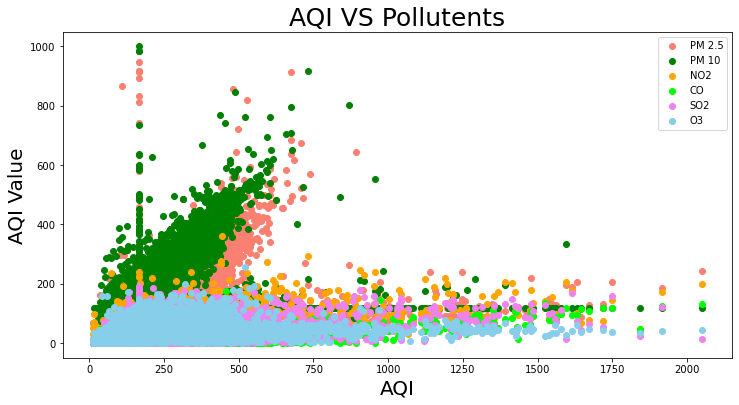

In [18]:
# Plotting the data
x = new_data['AQI']

y1 = new_data['PM2.5']
y2 = new_data['PM10']
y3 = new_data['NO2']
y4 = new_data['CO']
y5 = new_data['SO2']
y6 = new_data['O3']
plt.figure(figsize=(12,6))

plt.scatter(x,y1,label='PM 2.5',color='salmon')
plt.scatter(x,y2,label='PM 10',color='green')
plt.scatter(x,y3,label='NO2',color='orange')
plt.scatter(x,y4,label='CO',color='lime')
plt.scatter(x,y5,label='SO2',color='violet')
plt.scatter(x,y6,label='O3',color='skyblue')

plt.title('AQI VS Pollutents' ,fontsize = 25)
plt.xlabel('AQI', fontsize = 20)
plt.ylabel('AQI Value' , fontsize = 20)

plt.legend()
plt.show()

<AxesSubplot:>

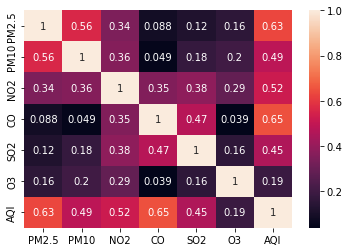

In [19]:
#Correlation between columns

correlation = new_data.corr()
sns.heatmap(correlation,annot = True)

# Data Training and Modeling 

## Splitting Data

In [20]:
# Importing libraries for splitting the data

from sklearn.model_selection import train_test_split

x = new_data[['PM2.5', 'PM10', 'NO2','CO', 'SO2','O3']]
y = new_data['AQI']

In [21]:
print(x.shape)
print(y.shape)

(29531, 6)
(29531,)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

## Scaling Data

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train[1:5]

array([[0.01896733, 0.074     , 0.04794521, 0.        , 0.03626943,
        0.10505837],
       [0.01159115, 0.04      , 0.07191781, 0.00571429, 0.05699482,
        0.15175097],
       [0.07586934, 0.118     , 0.08561644, 0.        , 0.02072539,
        0.06614786],
       [0.04109589, 0.052     , 0.07191781, 0.        , 0.04663212,
        0.12840467]])

## Linear Regression

In [24]:
# Importing Linear Regression Model

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train , y_train)

LinearRegression()

In [25]:
y_pred1 = linear_reg.predict(x_test)
y_pred1

array([386.45160492, 167.66696318, 152.42465843, ..., 191.64462102,
       147.79985111, 135.72489696])

In [26]:
score1 = linear_reg.score(x_train,y_train)
print("Accuracy:" , score1)


Accuracy: 0.7973412648992781


## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train , y_train)

LogisticRegression()

In [28]:
y_pred2 = logistic_reg.predict(x_test)
y_pred2

array([166, 166, 166, ..., 166, 166, 166])

In [29]:
score2 = logistic_reg.score(x_train,y_train)
print("Accuracy:" , score2)


Accuracy: 0.1568039823233606


## Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train , y_train)

Lasso()

In [31]:
y_pred3 = lasso_reg.predict(x_test)
y_pred3

array([342.68000721, 172.59980144, 149.64460492, ..., 185.71591422,
       154.9792943 , 140.1490663 ])

In [32]:
score3 = lasso_reg.score(x_train,y_train)
print("Accuracy:" , score3)


Accuracy: 0.7437005803477331


## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train , y_train)

Ridge()

In [34]:
y_pred4 = ridge_reg.predict(x_test)
y_pred4

array([386.92557206, 168.54217701, 151.99296482, ..., 190.45862123,
       148.60377378, 135.41230573])

In [35]:
score4 = ridge_reg.score(x_train,y_train)
print("Accuracy:" , score4)


Accuracy: 0.7969100362411432


## Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor()
decision_reg.fit(x_train , y_train)

DecisionTreeRegressor()

In [37]:
y_pred5 = decision_reg.predict(x_test)
y_pred5

array([349.        , 145.        , 166.        , ...,  73.        ,
       165.72492244, 166.        ])

In [38]:
score5 = decision_reg.score(x_train,y_train)
print("Accuracy:" , score5)


Accuracy: 0.9992041565481907


## Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()
random_reg.fit(x_train , y_train)

RandomForestRegressor()

In [40]:
y_pred6 = random_reg.predict(x_test)
y_pred6

array([369.94     , 145.01     , 153.38     , ..., 229.82     ,
       165.6869935, 166.       ])

In [41]:
score6 = random_reg.score(x_train,y_train)
print("Accuracy:" , score6)


Accuracy: 0.9805230880470627


# Performance Evaluation

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Mean absolute error
The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or l1-norm loss.
#### Mean squared error
The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.





In [43]:
linear = mean_absolute_error(y_test , y_pred1), np.sqrt(mean_squared_error(y_test , y_pred1)), score1, 
logistic = mean_absolute_error(y_test , y_pred2), np.sqrt(mean_squared_error(y_test , y_pred2)),score2
lasso = mean_absolute_error(y_test , y_pred3), np.sqrt(mean_squared_error(y_test , y_pred3)),score3
ridge = mean_absolute_error(y_test , y_pred4), np.sqrt(mean_squared_error(y_test , y_pred4)),score4
decision = mean_absolute_error(y_test , y_pred5), np.sqrt(mean_squared_error(y_test , y_pred5)),score5
random = mean_absolute_error(y_test , y_pred6), np.sqrt(mean_squared_error(y_test , y_pred6)),score6


In [44]:
print("Regresion Model     \t\t  MeanAbsoluteError  RootMeanSquaredError  AccuracyScore\n")
print("Linear Regression: \t\t" ,linear)
print("Logistic Regression: \t\t" ,logistic)
print("Lasso Regression: \t\t" ,lasso)
print("Ridge Regression: \t\t" ,ridge)
print("Decision Tree Regression: \t" ,decision)
print("Random Forest Regression: \t" ,random)

Regresion Model     		  MeanAbsoluteError  RootMeanSquaredError  AccuracyScore

Linear Regression: 		 (32.05109810633311, 58.87431794111964, 0.7973412648992781)
Logistic Regression: 		 (79.62037789516457, 127.12033248591166, 0.1568039823233606)
Lasso Regression: 		 (39.029432734019906, 66.0435318718608, 0.7437005803477331)
Ridge Regression: 		 (32.34989933619342, 58.97105947911408, 0.7969100362411432)
Decision Tree Regression: 	 (30.95814488406998, 62.5754368391761, 0.9992041565481907)
Random Forest Regression: 	 (22.799128251768575, 47.962140056641466, 0.9805230880470627)


From the above models we can say that Logistic Regression is not suitable in this dataset.

Linear Regression,Lasso Regression,Ridge Regression are good but Random Forest and Decision Tree are the best model.
     
Models according to best accuracy : 
##### Decision Tree > Random Forest > Linear > Ridge > Lasso > Logistic